# Netural Network Regression Algorithm

In [1]:
# we are going to solve the regression problem of hours price in
# which we have three features like this
import tensorflow as tf
tf.__version__

'2.17.1'

In [2]:
numbers_of_rooms = tf.range(1,11)
number_of_bed = tf.range(2,12)
number_of_washrooms = tf.range(1,11)
price = tf.range(7000,7010)
features = tf.constant(["rooms","bed","washrooms"]).numpy()


In [3]:

price

<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009],
      dtype=int32)>

In [4]:
number_of_bed

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [5]:
tf.concat([numbers_of_rooms,number_of_bed],0)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11], dtype=int32)>

In [6]:
number_of_bed

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [7]:
number_of_bed[...,tf.newaxis]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]], dtype=int32)>

In [8]:
features_data = tf.concat([numbers_of_rooms[...,tf.newaxis],number_of_bed[...,tf.newaxis],number_of_washrooms[...,tf.newaxis],price[...,tf.newaxis]],1)

In [9]:
import pandas as pd

df = pd.DataFrame(features_data,columns=["Rooms","Beds","Washrooms","Price"])
df

,Rooms,Beds,Washrooms,Price
0,1,2,1,7000
1,2,3,2,7001
2,3,4,3,7002
3,4,5,4,7003
4,5,6,5,7004
5,6,7,6,7005
6,7,8,7,7006
7,8,9,8,7007
8,9,10,9,7008
9,10,11,10,7009


In [10]:
df["Price"].to_numpy()

array([7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009],
      dtype=int32)

In [11]:
df[["Rooms","Washrooms"]].to_numpy()

array([[ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9],
       [10, 10]], dtype=int32)

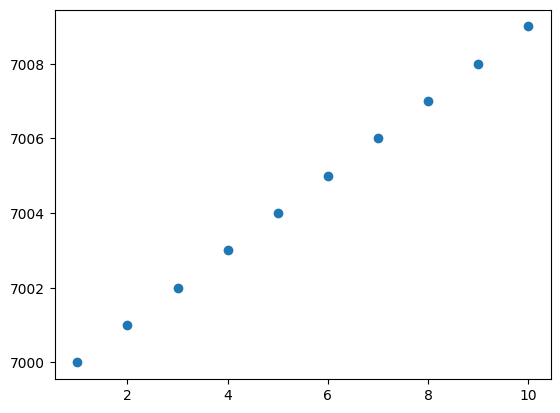

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df["Rooms"],df["Price"])


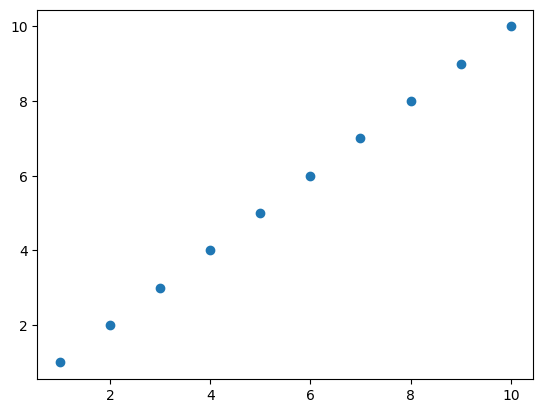

In [13]:
plt.scatter(numbers_of_rooms,numbers_of_rooms)

In [14]:
# now we have to work on the shape of the input and output


In [15]:
print("Rooms:",numbers_of_rooms,"\n")
print("Price Of House:",price)

Rooms: tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32) 

Price Of House: tf.Tensor([7000 7001 7002 7003 7004 7005 7006 7007 7008 7009], shape=(10,), dtype=int32)


In [16]:
numbers_of_rooms[0]  # no shape beacause scaler has no shape

<tf.Tensor: shape=(), dtype=int32, numpy=1>

## Steps To Solve A Regression Problem Using TensorFlow
+ Creating Model -  define the input, hidden and output layers of netural net
+ Compiling Model - define the loss function and the optimizer like SGD or Adam, and elaluation the model that how well our model is performing
+ Fitting Model - model can learn the pattern from the input and output data or dependent variable or independent variable

In [17]:
# input layer shape is how many features we have
# hidden layer min

# create model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # this is the input layer of the netural net
    tf.keras.layers.Dense(3), # hidden layer of the netural net with 3 units/ artificial neurons
    tf.keras.layers.Dense(1)
])
# model compiling
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae',tf.keras.metrics.MAE]
              )

model.fit(df["Rooms"].to_numpy(),df["Price"].to_numpy(),epochs=10,)






Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6999.5195 - mae: 6999.5195 - mean_absolute_error: 6999.5195
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 6998.9307 - mae: 6998.9307 - mean_absolute_error: 6998.9307
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6998.2759 - mae: 6998.2759 - mean_absolute_error: 6998.2759
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6997.5479 - mae: 6997.5479 - mean_absolute_error: 6997.5479
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6996.7373 - mae: 6996.7373 - mean_absolute_error: 6996.7373
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6995.8359 - mae: 6995.8359 - mean_absolute_error: 6995.8359
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 6994.8320 - mae: 6994.8320 - mean_absolute_error: 6994.8320
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 6993.7148 - mae: 6993.7148 - mean_absolute_error: 6993.7148
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6992.470

In [18]:
model.predict(tf.constant([1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[2.9583497]], dtype=float32)

In [19]:
1.1189432 + 7000.4541

7001.5730432

In [20]:
# Note that when using the delayed-build pattern (no input shape specified),
# the model gets built the first time you call `fit`, `eval`, or `predict`,
# or the first time you call the model on some input data.
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')

model.fit(tf.expand_dims(df["Rooms"].to_numpy(),-1),df["Price"].to_numpy(),epochs=10,)



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - loss: 49089108.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1620803452928.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1041414582168747585498338455191552.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: nan
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: nan
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: nan
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: nan
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: nan
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: nan
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: nan


In [21]:
model.weights

[<KerasVariable shape=(1, 10), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(10, 1), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_1/dense_3/bias>]

## Create Netural Network For Regression Problem

In [22]:
X = tf.range(-7,15,3,dtype=tf.float32)
y= tf.range(3,25,3,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

**Steps:**

Construct or import the pretrain model for the regressiong problem


In [23]:
# Create the model using sequential api

tf.random.set_seed(42)
model = tf.keras.Sequential([
    # tf.keras.Input(shape=(1,)), # input layer
     tf.keras.layers.Dense(1),# Hidden layer with 1 unit or neuron
    # tf.keras.layers.Dense(1) #output layer with 1 neuron
])


# model.count_params()
# model.weights
# model.layers
# model.output_shape


# model compilation: prepare the model for the data
# loss: how wrong the model predict compare to actual true value
# optimizer: how the model internal update the parameter to perform better perfomance
# matrics: how well the model performs
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
    )

# fitting the model on the train data so it will learn patterns from the tranning data
# Epochs: how many time the model go through the all of the training examples
model.fit(tf.expand_dims(X,-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step - loss: 10.5225 - mae: 10.5225
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.3900 - mae: 10.3900
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.2575 - mae: 10.2575
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 10.1250 - mae: 10.1250
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.9925 - mae: 9.9925
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 9.8600 - mae: 9.8600
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.7275 - mae: 9.7275
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.5950 - mae: 9.5950
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.4625 - mae: 9.4625
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 9.3300 - mae: 9.3300
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1975 - mae: 9.1975
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.0650 - mae: 9.0650
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [24]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[30.149641]], dtype=float32)

In [25]:
model.get_metrics_result()

{'loss': 6.896250247955322, 'mae': 6.896250247955322}

In [26]:
tf.keras.metrics.mae([27],[6.9589033]).numpy()

20.041096

## How to Improve Model Performance
+  create model: add more hidden layers, increasing the number of neurons in each hidden layer
+ Compile model: change the optimizer function or the learning rate of the optimizer
+ fit: we can also increase the number of epoch mean more epoch leaving it for long training

In [27]:
# lets rebuild our model
# create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden layer with one neuron
])
# compile
model.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics = [
        tf.keras.metrics.mae
    ]
)

# fitting the model

model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 20.3745 - mean_absolute_error: 20.3745
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.0933 - mean_absolute_error: 20.0933
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.8120 - mean_absolute_error: 19.8120
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 19.5308 - mean_absolute_error: 19.5308
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.2495 - mean_absolute_error: 19.2495
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.9683 - mean_absolute_error: 18.9683
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.6870 - mean_absolute_error: 18.6870
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.4058 - mean_absolute_error: 18.4058
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.1245 - mean_absolute_error: 18.1245
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.8433 - mean_absolute_error: 17.8433
Epoch 11/100
1/1 ━━━━━━━━━━━

In [28]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
# prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[29.163568]], dtype=float32)

In [30]:

# improve the model perfomance by increasing the number of neuron and activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),# one hidden layer with 100 neuron
    tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
# compile
model.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics = [
        tf.keras.metrics.mae
    ]
)

# fitting the model

model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step - loss: 13.2946 - mean_absolute_error: 13.2946
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 12.8326 - mean_absolute_error: 12.8326
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.3410 - mean_absolute_error: 12.3410
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8456 - mean_absolute_error: 11.8456
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.3016 - mean_absolute_error: 11.3016
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.6483 - mean_absolute_error: 10.6483
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7985 - mean_absolute_error: 9.7985
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.7869 - mean_absolute_error: 8.7869
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4762 - mean_absolute_error: 7.4762
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.7315 - mean_absolute_error: 5.7315
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [31]:
# prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[34.388046]], dtype=float32)

In [32]:

# improve the model perfomance by increasing the number of neuron and activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
# compile
model.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [
        tf.keras.metrics.mae
    ]
)

# fitting the model

model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5102 - mean_absolute_error: 12.5102
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.6177 - mean_absolute_error: 11.6177
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7448 - mean_absolute_error: 10.7448
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.8803 - mean_absolute_error: 9.8803
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.9961 - mean_absolute_error: 8.9961
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.0901 - mean_absolute_error: 8.0901
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.3044 - mean_absolute_error: 7.3044
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.5130 - mean_absolute_error: 6.5130
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.6919 - mean_absolute_error: 5.6919
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.8311 - mean_absolute_error: 4.8311
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms

In [33]:
# prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[27.341257]], dtype=float32)

In [34]:
model.weights

[<KerasVariable shape=(1, 100), dtype=float32, path=sequential_5/dense_10/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential_5/dense_10/bias>,
 <KerasVariable shape=(100, 1), dtype=float32, path=sequential_5/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_5/dense_11/bias>]

In [35]:
model.count_params()

301

## Model Evaluation In TensorFlow

In [36]:
X =  tf.range(-100.,100,4)
y= X + 10
X,y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

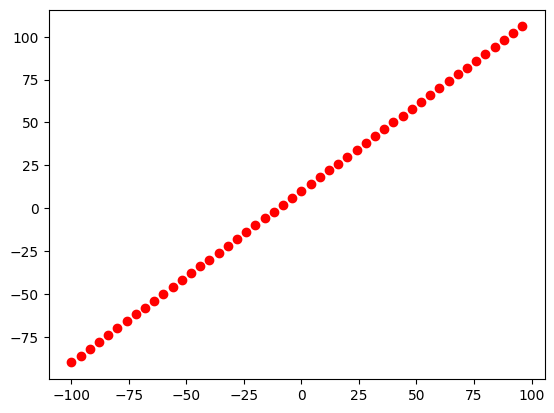

In [37]:

import matplotlib.pyplot as plt

plt.scatter(X,y,color="red")


Dataset In Machine Learning:
+ **Training data** (on which the model learn the pattern or relationship between the dependent variable and independent varables)
+ **Validation data** (on validatation data we tunning our model by changing the hyperparameters of the model for better perfomance )
+ **Test data** (we check the data on the test data that how we our model is work for the unseen data)

In [38]:
# train and split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,tf.newaxis].numpy(), y.numpy(), test_size=0.2, random_state=42)

# we have split the data in to 80% training and 20% test data


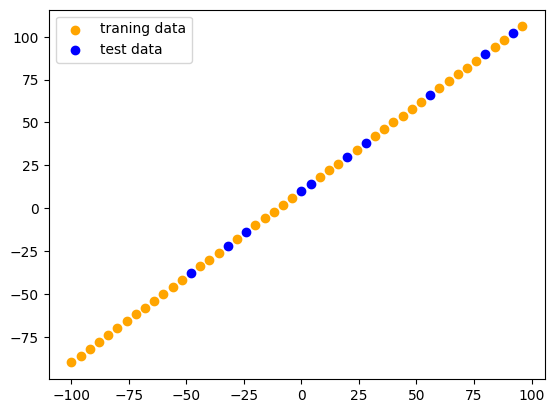

In [39]:
# visualization of our train and test data

plt.scatter(X_train,y_train,color='orange',label="traning data")
plt.scatter(X_test,y_test,color='blue',label="test data",)
plt.legend()


Now we have to create the model ( Aritificial Netural Network which is work good for the structure data like regression and classfication problems)

In [40]:
# creating model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,),name="input_layer"),
    tf.keras.layers.Dense(50,name="hidden_layer",activation='relu'),
    tf.keras.layers.Dense(1,name='output_layer') # output layer
],name="My_Netural_Network")

# one input layer and one output layer  is also called simple linear regression model


# compiling model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])




In [41]:
model.summary()

Model: "My_Netural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# fitting model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 50.8859 - mae: 50.8859  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.9201 - mae: 41.9201 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.2246 - mae: 33.2246 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.6830 - mae: 24.6830 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4095 - mae: 17.4095 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9884 - mae: 14.9884 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.5055 - mae: 10.5055 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7342 - mae: 4.7342 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9607 - mae: 5.9607 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9164 - mae: 8.9164 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9955 - mae: 9.9955   
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2528 - mae: 9.2528 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

what is trainable params ?
Trainable params means that the parameter learn and update during the traning time. This parameter need to optimize beacause they have great effect on the performance and accuracy of the model . Weight and bias trainable params

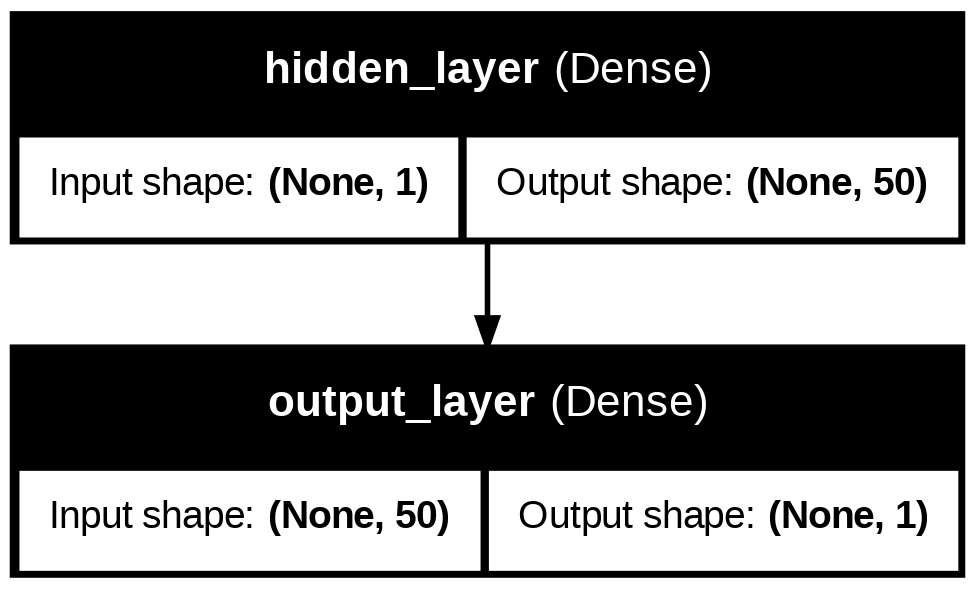

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

### Model Predictions

In [44]:
y_pred = model.predict(X_test)
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[-36.831852],
       [ 64.582436],
       [ 29.41237 ],
       [ 88.55731 ],
       [-21.140951],
       [100.55286 ],
       [ 14.024801],
       [ 10.16371 ],
       [ 37.211575],
       [-13.263676]], dtype=float32)

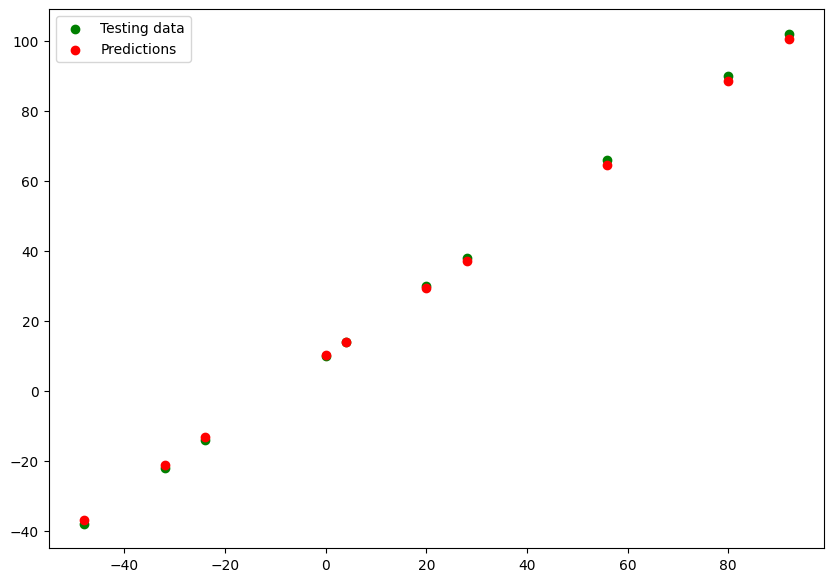

In [45]:
# we can show the model prediction value using the scatter plot


#  we have to create a function for this beacuse we have to reuse this many time as we progress

def plot_predictions(
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):

    plt.figure(figsize=(10,7))
    plt.scatter(test_data,test_labels,c='g',label='Testing data')
    plt.scatter(test_data,predictions,c='r',label='Predictions')
    plt.legend()
    plt.show()
# now call the function
plot_predictions()

## Evaluaton of the prediction using regression eveluation metrics

## In Regression Problem the most used evalution metrics are:
+ **MAE: Mean Absolute Error**
+ **MSE: Mean Square Error**
+ **Huber**


In [46]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.8635 - mae: 0.8635


[0.8635482788085938, 0.8635482788085938]

In [47]:
# Mean Absolute Error
mae_one = tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))
print(f"Mean Absolute Error:{mae_one}")

Mean Absolute Error:0.8635482788085938


In [48]:
# Mean Squar Error

msa = tf.keras.losses.mse(y_test,tf.squeeze(y_pred))
print(f"Mean Square Erro: {msa}")

Mean Square Erro: 0.9824107885360718


In [49]:
tf.reduce_mean(tf.square(y_test[:,tf.newaxis] - y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9824108>

In [50]:
tf.keras.metrics.mse(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9824108>


# Modelling Experiments:
1. `model_one` 1 layer and trained for 100 epochs
2. `model_two` 2 layers and trained for 100 epochs
3. `model_three` 2 layers, trained for 500 epochs

In [51]:
# For modle_one
model_one = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1) # one layer
])

model_one.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=[
        tf.keras.metrics.mae

    ] )

model_one.fit(tf.squeeze(X_train),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 100.1417 - mean_absolute_error: 100.1417 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 53.0190 - mean_absolute_error: 53.0190  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.9328 - mean_absolute_error: 15.9328
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1372 - mean_absolute_error: 10.1372 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3372 - mean_absolute_error: 9.3372 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6885 - mean_absolute_error: 9.6885 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0385 - mean_absolute_error: 10.0385 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4515 - mean_absolute_error: 9.4515 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7081 - mean_absolute_error: 9.7081
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.1645 - mean_absolute_error: 11.1645 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━

In [52]:
model_one_y_pred =  model_one.predict(X_test)
model_one_y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[-48.523884],
       [ 60.153694],
       [ 22.534534],
       [ 85.23314 ],
       [-31.804255],
       [ 97.77286 ],
       [  5.814907],
       [  1.635   ],
       [ 30.894348],
       [-23.44444 ]], dtype=float32)

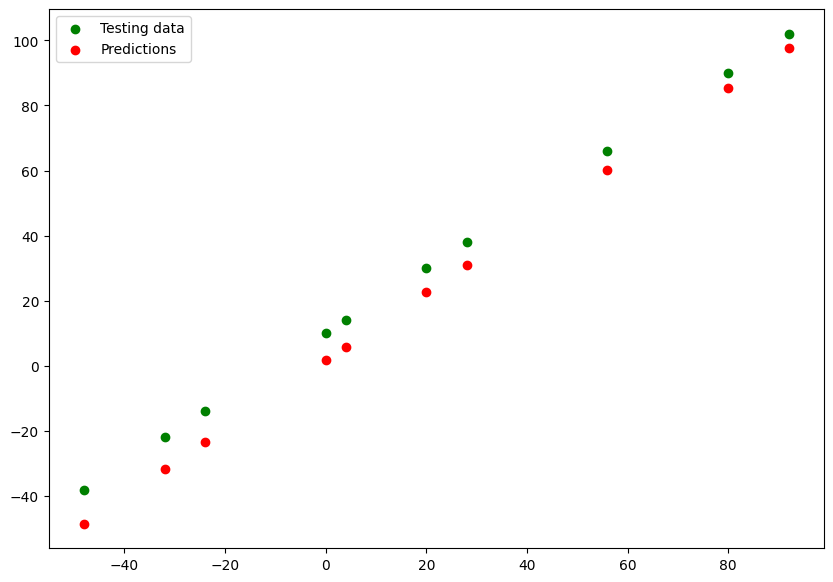

In [53]:
plot_predictions(predictions=model_one_y_pred)

In [54]:
# Mean Absolute Error
mae_one = tf.keras.losses.MAE(y_test,tf.squeeze(model_one_y_pred))
print(f"Mean Absolute Error:{mae_one}")

mse_one = tf.keras.losses.MSE(y_test,tf.squeeze(model_one_y_pred))
print(f"Mean Square Erro: {msa}")

Mean Absolute Error:7.5734100341796875
Mean Square Erro: 0.9824107885360718


In [55]:
model_one.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

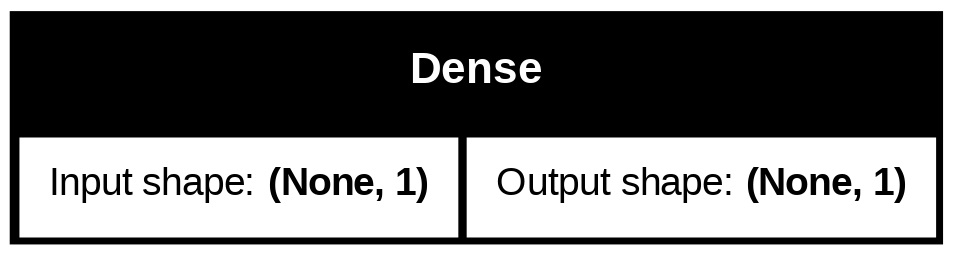

In [56]:
plot_model(model_one,show_shapes=True)

### Model 2


In [57]:
# i have to create the model

model_two = tf.keras.Sequential()
model_two.add(tf.keras.Input(shape=(1,)))
model_two.add(tf.keras.layers.Dense(units =1))
model_two.add(tf.keras.layers.Dense(units =1))


model_two.compile(loss= tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=[
                      tf.keras.metrics.mse
                  ])

# fit the model

model_two.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.6640 - mean_squared_error: 5333.0610  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.8990 - mean_squared_error: 2477.1086 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7873 - mean_squared_error: 438.9720 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8483 - mean_squared_error: 146.2459 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2316 - mean_squared_error: 529.6777 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.0789 - mean_squared_error: 287.4126 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2220 - mean_squared_error: 159.2434
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.6778 - mean_squared_error: 433.7193 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7657 - mean_squared_error: 144.0152 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.1587 - mean_squared_error: 525.5290 
Epoch 11/100
2/2 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


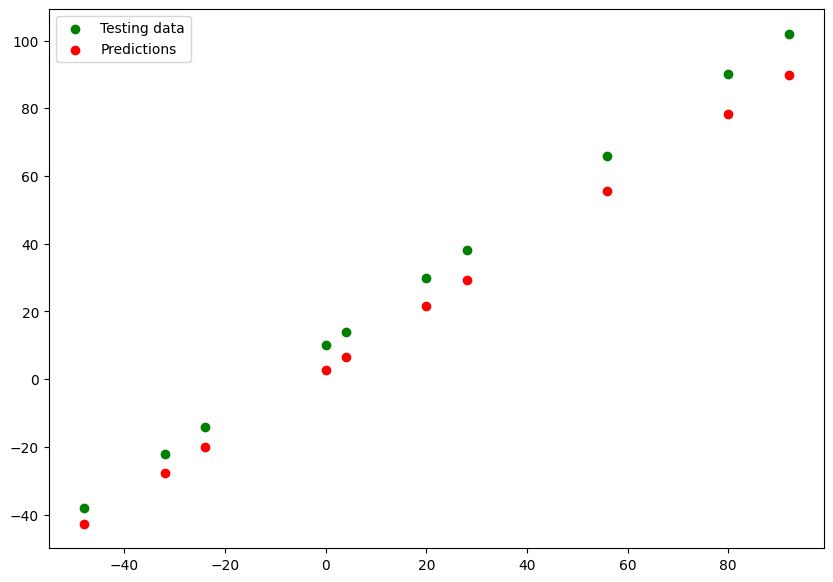

In [58]:
model_two_y_pred = model_two.predict(X_test)

plot_predictions(predictions=model_two_y_pred)


In [59]:
# Mean Absolute Error
mae_two = tf.keras.losses.MAE(y_test,tf.squeeze(model_two_y_pred))
print(f"Mean Absolute Error:{mae_one}")

mse_two = tf.keras.losses.MSE(y_test,tf.squeeze(model_two_y_pred))
print(f"Mean Square Error: {msa}")

Mean Absolute Error:7.5734100341796875
Mean Square Error: 0.9824107885360718


In [60]:

model_two.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

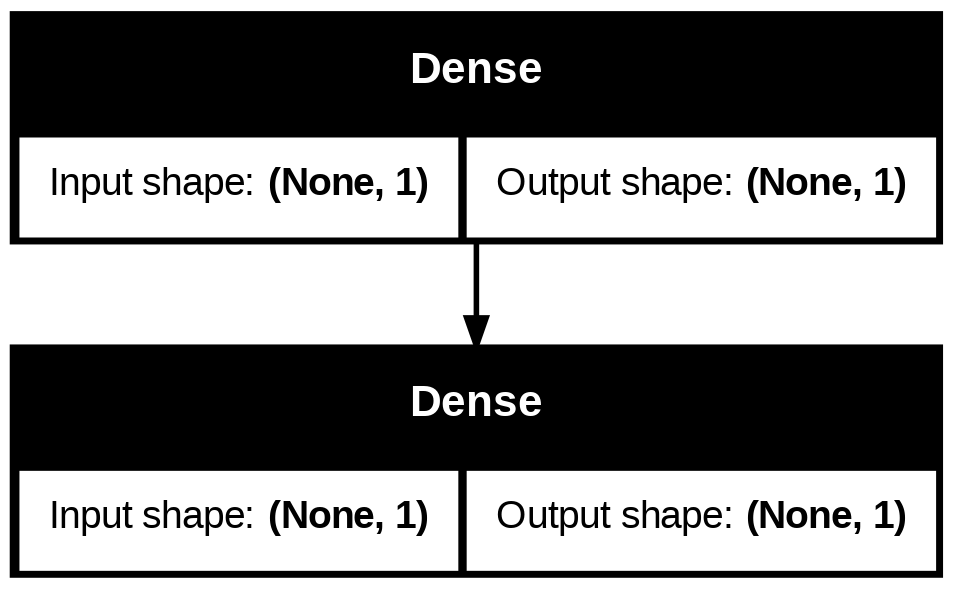

In [61]:
plot_model(model_two,show_shapes=True)

### Model 3

In [62]:
# i have to create the model

model_three = tf.keras.Sequential()
model_three.add(tf.keras.Input(shape=(1,)))
model_three.add(tf.keras.layers.Dense(units =10,))
model_three.add(tf.keras.layers.Dense(units =1))


model_three.compile(loss= tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=[
                      tf.keras.metrics.mse
                  ])

# fit the model

model_three.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 81.0640 - mean_squared_error: 8677.5156  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.2738 - mean_squared_error: 1190.3276
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.5086 - mean_squared_error: 170.6694
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.7646 - mean_squared_error: 499.6844 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3784 - mean_squared_error: 108.1566 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2193 - mean_squared_error: 118.7973 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4197 - mean_squared_error: 132.0585 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3985 - mean_squared_error: 100.4186
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.3037 - mean_squared_error: 503.9868
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.0454 - mean_squared_error: 122.5691 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


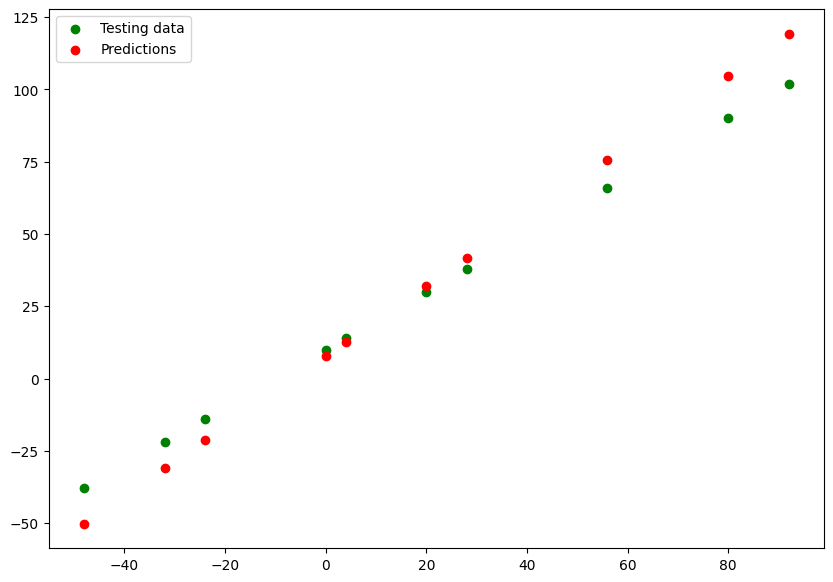

In [63]:
model_three_y_pred = model_three.predict(X_test)

plot_predictions(predictions=model_three_y_pred)

In [64]:
# Mean Absolute Error
mae_three = tf.keras.losses.MAE(y_test,tf.squeeze(model_three_y_pred))
print(f"Mean Absolute Error:{mae_three}")

mse_three = tf.keras.losses.MSE(y_test,tf.squeeze(model_three_y_pred))
print(f"Mean Square Erro: {mse_three}")

Mean Absolute Error:7.89776611328125
Mean Square Erro: 90.73617553710938


# Comparing of Experments Results

In [65]:
import pandas as pd

data = {
    "model":["Model_One","Model_Two","Model_Three"],
    "MAE":[mae_one.numpy(),mae_two.numpy(),mae_three.numpy()],
    "MSE":[mse_one.numpy(),mse_two.numpy(),mse_three.numpy()]
}

model_data = pd.DataFrame(data)
model_data

,model,MAE,MSE
0,Model_One,7.573410,61.403637
1,Model_Two,8.253428,73.894547
2,Model_Three,7.897766,90.736176


In [66]:
import seaborn as sns
# Create a color palette using seaborn's color_palette function
custom_palette = sns.color_palette("Set2") # You can choose a different color palette
# Set the palette globally
sns.set_palette(custom_palette)
# a

<Axes: xlabel='model', ylabel='MAE'>

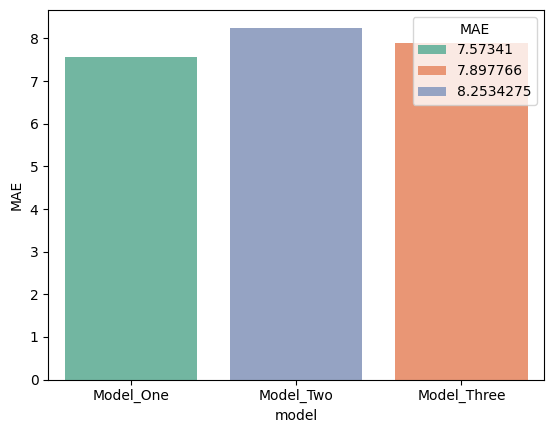

In [67]:
sns.barplot(data=model_data,x='model',y="MAE",hue="MAE",palette=custom_palette[0:3])

<Axes: xlabel='model', ylabel='MSE'>

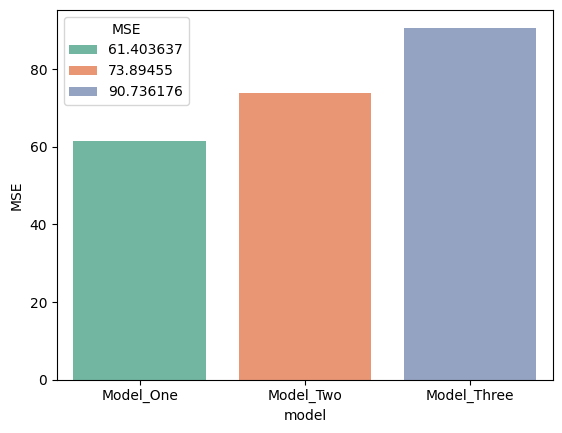

In [68]:
sns.barplot(data=model_data,x='model',y="MSE",estimator='sum',hue="MSE",palette=custom_palette[0:3])

### Weights and Biases Tool For ML Engineers

In [69]:
# import wandb

In [70]:
# # Start a run, tracking hyperparameters
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="Deep Learning Project",

#     # track hyperparameters and run metadata with wandb.config
#     config={
#         "optimizer": "sgd",
#         "loss": "mae",
#         "metric": "mse",
#         "epoch": 10,
#     },
#     settings=wandb.Settings(init_timeout=120)
# )

# wandb.init()
# # [optional] use wandb.config as your config
# config = wandb.config



# model_three = tf.keras.Sequential()
# model_three.add(tf.keras.Input(shape=(1,)))
# model_three.add(tf.keras.layers.Dense(units =10,))
# model_three.add(tf.keras.layers.Dense(units =1))


# model_three.compile(loss= tf.keras.losses.mae,
#                   optimizer= tf.keras.optimizers.SGD(),
#                   metrics=[
#                       tf.keras.metrics.mse
#                   ])

# # fit the model

# model_three.fit(X_train,y_train,epochs=10, callbacks=[

#                      wandb.keras.WandbMetricsLogger(log_freq=5),
#                      wandb.keras.WandbModelCheckpoint("models.keras")

#                     ])

# # [optional] finish the wandb run, necessary in notebooks
# wandb.finish()

### Save of model?
There are three method to save the model in tensor flow
+ .keras format
+ Two legacy formats: SavedModel, and HDF5.

In [71]:
model_three.save("my_model.keras") # save model in keras format Recommended Formate

In [72]:
# HDF5 Format is considered Legacy

model_three.save("my_model.h5") # save model in h5 formate (Old Format)

### Loading of the model  

In [73]:
loaded_model_three = tf.keras.models.load_model("my_model.keras")
loaded_model_three.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
model_three.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [75]:
# Mean Absolute Error

y_pred = loaded_model_three.predict(X_test)
mae_three = tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))
print(f"Mean Absolute Error:{mae_three}")

mse_three = tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))
print(f"Mean Square Erro: {mse_three}")

# perfect we get same result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Mean Absolute Error:7.89776611328125
Mean Square Erro: 90.73617553710938


## Working with files in Colab:
+ upload file to colab
+ download file to colab
+ mount google drive
+ save file to google drive

In [76]:
from google.colab import files

# # uploading File

# uploaded = files.upload()



In [77]:
# downloading file

# files.download("my_model.keras")



### Accessing files in google drive

In [78]:
# mount the gogole drive
# from google.colab import drive
# drive.mount('/content/drive')

In [91]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# unmount the drive
# drive.flush_and_unmount()

Mounted at /content/drive


In [88]:
!ls /content/drive/MyDrive


'Deep Learning With TensorFlow'


In [93]:
!cat /content/drive/MyDrive/Deep Learning With TensorFlow/tensorflow_fundamentals_1.ipynb

cat: /content/drive/MyDrive/Deep: No such file or directory
cat: Learning: No such file or directory
cat: With: No such file or directory
cat: TensorFlow/tensorflow_fundamentals_1.ipynb: No such file or directory


In [82]:
# files.download("model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>